# Feature Selection and Feature Engineering

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from mlxtend.featre_selection import SequentialFeatureSelector

ImportError: No module named pandas

## Agenda

SWBAT:



## Model Selection

Let's imagine that I'm going to try to predict wine quality based on the other features.

Now: Which columns (predictors) should I choose? There are 12 predictors I could choose from. For each of these predictors, I could either use it or not use it in my model, which means that there are 2^12 = 4096 different models I could construct! Well, okay, one of these is the "empty model" with no predictors in it. But there are still 4095 models from which I can choose.

How can I decide which predictors to use in my model?

We'll explore a few methods here.

In [20]:
wine = pd.read_csv('data/wine.csv')

### Correlation

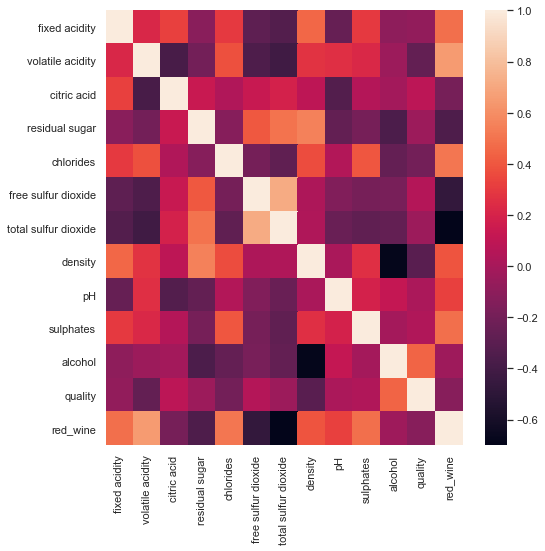

In [21]:
# Use the .corr() DataFrame method to find out about the
# correlation values between all pairs of variables!

wine.corr()

sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(wine.corr());

In [23]:
# Let's look at the correlations with 'quality'
# (our dependent variable) in particular.

wine.corr()['quality'].map(abs).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
red_wine                0.119323
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

In [24]:
# Let's choose 'alcohol' and 'density'.

wine_preds = wine[['alcohol', 'density']]
wine_target = wine['quality']

In [26]:
lr = LinearRegression()

lr.fit(wine_preds, wine_target)

LinearRegression()

In [27]:
lr.score(wine_preds, wine_target)

0.19741993980311323

## Recursive Feature Elimination

The idea behind recursive feature elimination is to start with all predictive features and then build down to a small set of features slowly, by eliminating the features with the lowest coefficients.

That is:
1. Start with a model with _all_ $n$ predictors;
2. find the predictor with the smallest coefficient;
3. throw that predictor out and build a model with the remining $n-1$ predictors;
4. set $n = n-1$ and repeat until $n-1$ has the value you want!

### Recursive Feature Elimination in Scikit-Learn

In [28]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=1)
select = select.fit(X = wine.drop('quality', axis=1), y = wine['quality'])

In [29]:
select.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False, False])

In [30]:
select.ranking_

array([ 9,  4,  6, 10,  2, 11, 12,  1,  8,  3,  5,  7])

Caution: RFE is probably not a good strategy if your initial dataset has many predictors. It will likely be easier to start with a *simple* model and then slowly increase its complexity. This is also good advice for when you're first getting your feet wet with `sklearn`!

For more on feature selection, see [this post](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2).

## Feature Engineering

Sometimes we can get better performance if we multiply features together. Consider the following dataset:

In [8]:
sales = pd.read_csv('data/Advertising.csv', index_col=0)

sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


We'd like to try to understand sales as a function of spending on various media (TV, radio, newspaper). We could check correlations of sales with the different features:

In [9]:
sales.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

The correlation with TV spending is pretty high. But look what happens when we add a new column:

In [10]:
sales['TV+Radio'] = sales['TV'] * sales['radio']

sales.corr()['sales']['TV+Radio']

0.9639320459920486

The correlation here is amazing! Let's make ourselves a plot:

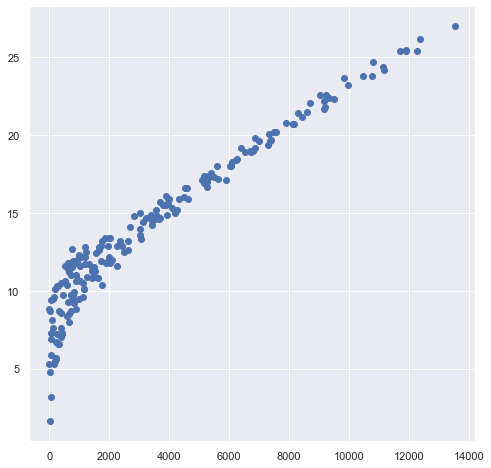

In [13]:
fig, ax = plt.subplots()
ax.scatter(sales['TV+Radio'], sales['sales']);

In practice, it's not easy to tell when such products of features will be so fruitful. Moreover, there is room for concern about violating regression's demand for feature independence. At the very least, we would probably not want to include a product *and the individual features themselves* in a final model, not if our goal is to understand what's really responsible for fluctuations in our target variable.